In [12]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes
# Save references to each table
#Measurement = Base.classes.Measurement
#Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [15]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp =session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [47]:
#  3. Convert the June temperatures to a list.
june_temp =session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

In [51]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_data_frame = pd.DataFrame(june_temp, columns=['date','june_temp'])
june_data_frame.set_index(june_data_frame['date'], inplace=True)

In [52]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_data_frame.describe()

,june_temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [54]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp =session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [55]:
# 7. Convert the December temperatures to a list.
dec_temp =session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [56]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_data_frame = pd.DataFrame(dec_temp, columns=['date','dec_temp'])
dec_data_frame.set_index(dec_data_frame['date'], inplace=True)

In [58]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_data_frame.describe()

,dec_temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Visualizations

<AxesSubplot:ylabel='Frequency'>

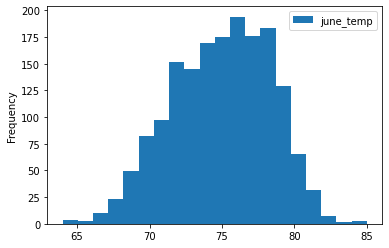

In [60]:
june_data_frame.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

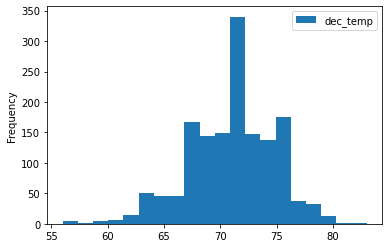

In [62]:
dec_data_frame.plot.hist(bins=20)